# Analysis of Video and Image Data for cropping and texture features
Author(s): Miguel Xochicale @mxochicale    
Contributor(s): Sujon Hekim

## History
* 17th May 2023: Add prototype
* 10th Aug 2023: Adds saving dataframes in cvs files
* 26th Sep 2023: Reads data from Thu-24-Aug-2023

## Summary


### How to run the notebook
1. Go to repository path: `$HOME/repositories/`
Open repo in pycharm and in the terminal type:
```
git checkout main # or the branch
git pull # to bring a local branch up-to-date with its remote version
```

2. Launch Notebook server. Go to you repository path: cd $HOME/repositories/ and type in the pycharm terminal:
```
mamba activate *VE 
jupyter notebook --browser=firefox
```
which will open your web-browser.

## References 
1. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe
2. https://github.com/YuxinZhaozyx/pytorch-VideoDataset/blob/master/datasets.py (Future work)
3. https://stackoverflow.com/questions/65446464/how-to-convert-a-video-in-numpy-array
4. https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py 
5. https://www.researchgate.net/publication/326881329_Medical_image_security_enhancement_using_two_dimensional_chaotic_mapping_optimized_by_self-adaptive_grey_wolf_algorithm 

    

## Setting imports and datasets paths

In [1]:
from rtt4ssa.utils.utils import video_to_tensor, compute_texture_array_and_plot
from rtt4ssa.utils.utils import data_frame_of_texture_analysis
from rtt4ssa.utils.utils import get_and_plot_imu_data_analysis

import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import skimage
from typing import Tuple, List

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/rtt4ssa'

###########################
###SETTING DATA_PATHS
#DATA_PATH='repositories/datasets/in2research2023/Thu-27-Jul-2023' 

RAW_DATA_PATH='repositories/datasets/in2research2023/Thu-24-Aug-2023'
PREPROCESSED_DATA_PATH='repositories/datasets/in2research2023/Thu-24-Aug-2023-preprocessed'

FULL_REPO_DATA_PATH = HOME_PATH +'/' + RAW_DATA_PATH
FULL_REPO_PREPROCESSED_DATA_PATH = HOME_PATH +'/' + PREPROCESSED_DATA_PATH +'/'
os.makedirs(FULL_REPO_PREPROCESSED_DATA_PATH, exist_ok=True) 

## Printing Versions and paths
print(FULL_REPO_DATA_PATH)
print(f'PyTorch Version: {torch.__version__}')
print(f'pandas Version: {pd.__version__}')
print(f'numpy Version: {np.__version__}')
print(f'cv2 Version: {cv2.__version__}')
print(f'skimage Version: {skimage.__version__}')



/home/mxochicale/repositories/datasets/in2research2023/Thu-24-Aug-2023
PyTorch Version: 2.0.0.post200
pandas Version: 2.0.3
numpy Version: 1.25.2
cv2 Version: 4.8.0
skimage Version: 0.21.0


# Reading video frames

In [2]:
PARTICIPANTNN = 'participant01'
PARTICIPANTNN_TESTNN = 'participant01-test01-rep01-1g-5mins' #51,328
# PARTICIPANTNN_TESTNN = 'participant01-test01-rep02-1g-5mins' #51,178
# PARTICIPANTNN_TESTNN = 'participant01-test02-rep01-1g-5mins' #49,183
# PARTICIPANTNN_TESTNN = 'participant01-test02-rep02-1g-5mins' #47,577
# PARTICIPANTNN_TESTNN = 'participant01-test03-rep01-1g-5mins' #48,688
# PARTICIPANTNN_TESTNN = 'participant01-test03-rep02-1g-5mins'#48,789

# PARTICIPANTNN = participant02
# PARTICIPANTNN_TESTNN = 'participant02-test01-rep01-1g-5mins'#49,490
# PARTICIPANTNN_TESTNN = 'participant02-test01-rep02-1g-5mins'#49,219
# PARTICIPANTNN_TESTNN = 'participant02-test02-rep01-1g-5mins'#48,043
# PARTICIPANTNN_TESTNN = 'participant02-test02-rep02-1g-5mins'#49,606
# PARTICIPANTNN_TESTNN = 'participant02-test03-rep01-1g-5mins'#48,875
# PARTICIPANTNN_TESTNN = 'participant02-test03-rep02-1g-5mins'#48,050

start_frame_number = 0
end_frame_number = 39 #(resulted samples are end_frame_number-2)

display_factor_for_texture_analysis_array = 10000

# display_figures=False
display_figures=True




In [3]:

CSV_FILENAME_FOR_TEXTURE_ANALYSIS=PARTICIPANTNN_TESTNN+'.csv'
FULL_PATH_AND_AVI_FILE = os.path.join(FULL_REPO_DATA_PATH, PARTICIPANTNN, PARTICIPANTNN_TESTNN+'.avi')
FULL_PATH_AND_CSV_FILE = os.path.join(FULL_REPO_DATA_PATH, PARTICIPANTNN, PARTICIPANTNN_TESTNN+'.avi.csv')

total_number_of_frames = end_frame_number - start_frame_number


video, frames_timestam = video_to_tensor(FULL_PATH_AND_AVI_FILE, start_frame_number, end_frame_number)

num_frames, height, width = video.shape
print(f'num_frames: {num_frames}')
print(f'height: {height}')
print(f'width: {width}')


  
  
  VIDEO_FEATURES
    video_name=/home/mxochicale/repositories/datasets/in2research2023/Thu-24-Aug-2023/participant01/participant01-test01-rep01-1g-5mins.avi
    Frame_height=480, frame_width=640 fps=120 nframes=51328 
  
  
num_frames: 34
height: 480
width: 640


# Generating texture_analysis_array and plotting frames and histograms

frame_i: 0, timestamp 00:00:0.000


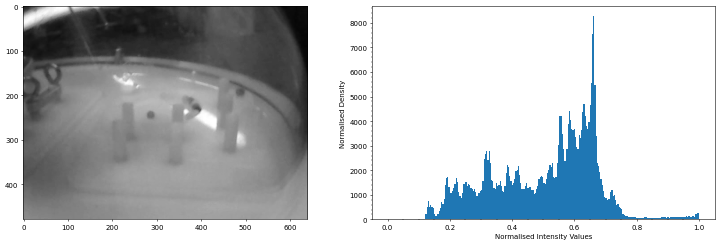

In [4]:
# This takes a while as it computes texture feature for each frame and save it in texture_analysis_array
texture_analysis_array = compute_texture_array_and_plot(video, frames_timestam, display_figures, display_factor_for_texture_analysis_array)


# Plotting texture analysis of all frames in the video

In [5]:
df_texture_analysis = data_frame_of_texture_analysis(texture_analysis_array, start_frame_number, end_frame_number)
# df_texture_analysis.to_csv(FULL_REPO_PREPROCESSED_DATA_PATH+PARTICIPANTNN_TESTNN+'_texture_analysis'+'.csv', index=False) 

In [6]:
print(df_texture_analysis)

    frame_i  Contrast  Correlation  Dissimilarity    Energy  Homogeneity  \
0         0  3.308281     0.999091       0.866927  0.058461     0.698238   
1         1  3.308281     0.999091       0.866927  0.058461     0.698238   
2         2  3.308281     0.999091       0.866927  0.058461     0.698238   
3         3  3.308281     0.999091       0.866927  0.058461     0.698238   
4         4  3.308281     0.999091       0.866927  0.058461     0.698238   
5         5  3.308281     0.999091       0.866927  0.058461     0.698238   
6         6  3.308281     0.999091       0.866927  0.058461     0.698238   
7         7  3.308281     0.999091       0.866927  0.058461     0.698238   
8         8  3.308281     0.999091       0.866927  0.058461     0.698238   
9         9  3.308281     0.999091       0.866927  0.058461     0.698238   
10       10  3.307284     0.999113       0.866745  0.057763     0.698605   
11       11  3.307284     0.999113       0.866745  0.057763     0.698605   
12       12 

## Reading and ploting csv files

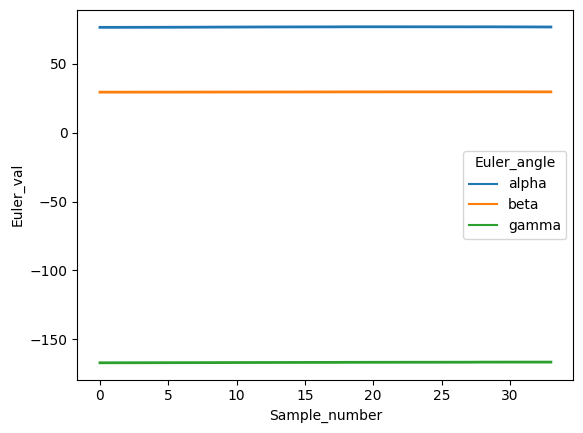

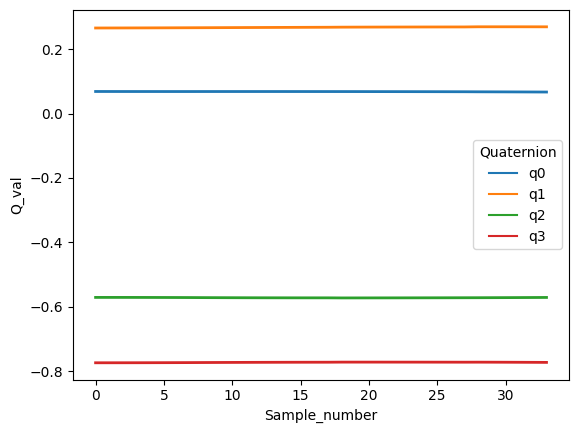

In [7]:
df, ndf, nqdf = get_and_plot_imu_data_analysis(FULL_PATH_AND_CSV_FILE, start_frame_number, end_frame_number, display_figures)


In [8]:
ndf

,Sample_number,Euler_angle,Euler_val
0,0,alpha,76.263512
1,1,alpha,76.268105
2,2,alpha,76.277130
3,3,alpha,76.290985
4,4,alpha,76.309441
...,...,...,...
97,29,gamma,-166.441559
98,30,gamma,-166.436279
99,31,gamma,-166.430801
100,32,gamma,-166.426559


In [9]:
nqdf

,Sample_number,Quaternion,Q_val
0,0,q0,0.068419
1,1,q0,0.068369
2,2,q0,0.068327
3,3,q0,0.068299
4,4,q0,0.068282
...,...,...,...
131,29,q3,-0.772062
132,30,q3,-0.772186
133,31,q3,-0.772331
134,32,q3,-0.772491


In [10]:
df
# To save full dataframe as cvs
# df.to_csv(FULL_REPO_PREPROCESSED_DATA_PATH+PARTICIPANTNN_TESTNN+'_tracker_sensor'+'.csv', index=False) 

,Sample_number,epoch machine time (ns),Timestamp for frame capture.read (ns),Timestamp LPMSB2 (s),Quaternions_LPMSB2,Euler_LPMSB2,A,B,C,q0,q1,q2,q3
0,0,1692882663543262563,1692882663543480781,1212.310,"[0.06841902434825897, 0.2655182480812073, -0.5...","[76.26351165771484, 29.279926300048828, -166.9...",76.263512,29.279926,-166.927963,0.068419,0.265518,-0.570912,-0.773872
1,1,1692882663579540015,1692882663543480781,1212.315,"[0.06836933642625809, 0.2656002640724182, -0.5...","[76.26810455322266, 29.283796310424805, -166.9...",76.268105,29.283796,-166.915955,0.068369,0.265600,-0.570907,-0.773852
2,2,1692882663587530055,1692882663543480781,1212.320,"[0.06832683086395264, 0.2656897306442261, -0.5...","[76.27713012695312, 29.288410186767578, -166.9...",76.277130,29.288410,-166.902878,0.068327,0.265690,-0.570928,-0.773810
3,3,1692882663596395389,1692882663543480781,1212.325,"[0.0682985931634903, 0.2657907009124756, -0.57...","[76.29098510742188, 29.29462432861328, -166.88...",76.290985,29.294624,-166.888977,0.068299,0.265791,-0.570976,-0.773742
4,4,1692882663604048535,1692882663543480781,1212.330,"[0.06828176230192184, 0.26590365171432495, -0....","[76.30944061279297, 29.30230140686035, -166.87...",76.309441,29.302301,-166.874039,0.068282,0.265904,-0.571050,-0.773651
5,5,1692882663613983885,1692882663543480781,1212.335,"[0.06826476752758026, 0.2660314440727234, -0.5...","[76.3320083618164, 29.310949325561523, -166.85...",76.332008,29.310949,-166.856873,0.068265,0.266031,-0.571144,-0.773539
6,6,1692882663621528714,1692882663543480781,1212.340,"[0.06825622916221619, 0.2661668062210083, -0.5...","[76.35751342773438, 29.320600509643555, -166.8...",76.357513,29.320601,-166.839127,0.068256,0.266167,-0.571255,-0.773411
7,7,1692882663629043041,1692882663543480781,1212.345,"[0.06825550645589828, 0.2663067877292633, -0.5...","[76.38526916503906, 29.33100700378418, -166.82...",76.385269,29.331007,-166.821167,0.068256,0.266307,-0.571378,-0.773272
8,8,1692882663635478122,1692882663543480781,1212.350,"[0.06828392297029495, 0.26643621921539307, -0....","[76.42442321777344, 29.341230392456055, -166.8...",76.424423,29.341230,-166.803726,0.068284,0.266436,-0.571580,-0.773075
9,9,1692882663643693302,1692882663644998310,1212.355,"[0.06828586012125015, 0.26659807562828064, -0....","[76.4558334350586, 29.3535213470459, -166.7833...",76.455833,29.353521,-166.783356,0.068286,0.266598,-0.571719,-0.772917


## Saving dataframes as cvs

In [11]:
df_a = df_texture_analysis[['frame_i', 'Contrast_normalised', 'Correlation_normalised', 'Dissimilarity_normalised', 'Energy_normalised', 'Homogeneity_normalised', 'ASM_normalised']]
df_b = df[['q0', 'q1', 'q2', 'q3']]
dff = pd.concat([df_a, df_b], axis=1)
print(dff)

dff.to_csv(FULL_REPO_PREPROCESSED_DATA_PATH+PARTICIPANTNN_TESTNN+'_normalised_quaternions'+'.csv', index=False) 



    frame_i  Contrast_normalised  Correlation_normalised  \
0         0            -0.597172               -1.331077   
1         1            -0.597172               -1.331077   
2         2            -0.597172               -1.331077   
3         3            -0.597172               -1.331077   
4         4            -0.597172               -1.331077   
5         5            -0.597172               -1.331077   
6         6            -0.597172               -1.331077   
7         7            -0.597172               -1.331077   
8         8            -0.597172               -1.331077   
9         9            -0.597172               -1.331077   
10       10            -0.663200                0.069726   
11       11            -0.663200                0.069726   
12       12            -0.663200                0.069726   
13       13            -0.663200                0.069726   
14       14            -0.663200                0.069726   
15       15            -0.663200        

In [12]:
# TO ADD IN UTILS on 26Sep2023
# ## Comment/uncomment any of the following lines to show however axis you would like to see in the plot
# ## TODO: https://seaborn.pydata.org/generated/seaborn.lineplot.html

# ### Ploting all texture features 
# fig, axs = plt.subplots(2,3, figsize=(12, 6))

# df_texture_analysis.plot(x='frame_i', y='Contrast', ax=axs[0,0] )
# # axs[0,0].set_ylim((0,15)) 

# df_texture_analysis.plot(x='frame_i', y='Correlation', ax=axs[0,1])
# # # axs[0,2].set_ylim((0.997,0.999)) 

# df_texture_analysis.plot(x='frame_i', y='Dissimilarity', ax=axs[0,2])
# # axs[0,1].set_ylim((0.75,1.5)) 

# df_texture_analysis.plot(x='frame_i', y='Energy', ax=axs[1,0])

# df_texture_analysis.plot(x='frame_i', y='Homogeneity', ax=axs[1,1])
# df_texture_analysis.plot(x='frame_i', y='ASM', ax=axs[1,2])

# plt.show()

# ### Ploting all texture features 
# fig, axs = plt.subplots(2,3, figsize=(12, 6))

# df_texture_analysis.plot(x='frame_i', y='Contrast_normalised', ax=axs[0,0] )
# # axs[0,0].set_ylim((0,15)) 

# df_texture_analysis.plot(x='frame_i', y='Correlation_normalised', ax=axs[0,1])
# # # axs[0,2].set_ylim((0.997,0.999)) 

# df_texture_analysis.plot(x='frame_i', y='Dissimilarity_normalised', ax=axs[0,2])
# # axs[0,1].set_ylim((0.75,1.5)) 

# df_texture_analysis.plot(x='frame_i', y='Energy_normalised', ax=axs[1,0])

# df_texture_analysis.plot(x='frame_i', y='Homogeneity_normalised', ax=axs[1,1])
# df_texture_analysis.plot(x='frame_i', y='ASM_normalised', ax=axs[1,2])

# plt.show()



# ### Ploting single texture feature
# ax = plt.gca()
# df_texture_analysis.plot(x='frame_i', y='ASM', ax=ax)
# # plt.ylim((0.003,0.005))
# plt.grid()
# plt.show()


# ax = plt.gca()
# df_texture_analysis.plot(x='frame_i', y='ASM_normalised', ax=ax)
# plt.grid()
# plt.show()

